In [1]:
import torch

/home/azanella/anaconda3/envs/heart_seg/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
PATH_fine_tuned = '/media/sharedata/atriumCT/atrium_nnunet/nnUNet_results/Dataset004_LA_CT00_corrected_voted/nnUNetTrainer__nnUNetPlans_Dataset002__3d_fullres/fold_0/checkpoint_best.pth'

In [7]:
model_dict_fine_tuned = torch.load(PATH_fine_tuned)

In [13]:
model_dict_fine_tuned['network_weights']


OrderedDict([('encoder.stages.0.0.convs.0.conv.weight',
              tensor([[[[[ 9.3470e-02, -4.3902e-02,  7.7079e-02],
                         [-7.1236e-02, -1.9903e-01, -5.7851e-02],
                         [ 2.7193e-02, -6.8941e-02,  8.3472e-02]],
              
                        [[-5.3454e-02, -2.0986e-01, -6.0326e-02],
                         [-2.0977e-01, -3.5737e-01, -2.0490e-01],
                         [-8.4385e-02, -1.9794e-01, -5.0896e-02]],
              
                        [[ 8.7504e-02, -4.3886e-02,  7.7741e-02],
                         [-2.4246e-02, -1.6215e-01, -5.8556e-02],
                         [ 6.3705e-02, -4.5979e-02,  4.9236e-02]]]],
              
              
              
                      [[[[-1.2771e-02, -2.4610e-02, -1.2108e-02],
                         [-3.3037e-02, -3.6654e-02, -3.0284e-02],
                         [-1.1779e-02, -2.2559e-02,  1.7094e-03]],
              
                        [[-9.0335e-03, -1.3636e-02, -1.8

In [9]:
PATH_pretrained = '/media/sharedata/atriumCT/atrium_nnunet/nnUNet_preprocessed/Dataset004_LA_CT00_corrected_voted/checkpoint_best_Dataset002_fold_0_3d_fullres.pth'

In [10]:
model_dict_pretrained = torch.load(PATH_pretrained)

In [12]:
model_dict_pretrained['network_weights']


OrderedDict([('encoder.stages.0.0.convs.0.conv.weight',
              tensor([[[[[ 9.3470e-02, -4.3902e-02,  7.7079e-02],
                         [-7.1236e-02, -1.9903e-01, -5.7851e-02],
                         [ 2.7193e-02, -6.8941e-02,  8.3472e-02]],
              
                        [[-5.3454e-02, -2.0986e-01, -6.0326e-02],
                         [-2.0977e-01, -3.5737e-01, -2.0490e-01],
                         [-8.4385e-02, -1.9794e-01, -5.0896e-02]],
              
                        [[ 8.7504e-02, -4.3886e-02,  7.7741e-02],
                         [-2.4246e-02, -1.6215e-01, -5.8556e-02],
                         [ 6.3705e-02, -4.5979e-02,  4.9236e-02]]]],
              
              
              
                      [[[[-1.2771e-02, -2.4610e-02, -1.2108e-02],
                         [-3.3037e-02, -3.6654e-02, -3.0284e-02],
                         [-1.1779e-02, -2.2559e-02,  1.7094e-03]],
              
                        [[-9.0335e-03, -1.3636e-02, -1.8

In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('/media/sharedata/atriumCT/atrium_nnunet/nnUNet_results/Dataset004_LA_CT00_corrected_voted/nnUNetTrainer__nnUNetPlans_Dataset002__3d_fullres/fold_0/validation/patients_history_metrics.csv', index_col=0)

In [12]:
df.head()

ID  Stroke_ait_history  peripheral_embolism_hist  embolism_hist  \
Unnamed: 0                                                                    
0            6                   1                         0              1   
1            7                   1                         0              1   
2            8                   0                         0              0   
3            9                   1                         0              1   
4           11                   0                         0              0   

            verified_thrombus  LAA_opacification_defect  Dice  IoU  nnUnet_id  \
Unnamed: 0                                                                      
0                           0                         0   NaN  NaN        NaN   
1                           0                         1   NaN  NaN        NaN   
2                           0                         0   NaN  NaN        NaN   
3                           0                         1   NaN  NaN        NaN   
4                           0                         0   NaN  NaN        NaN   

            Contour_Volume  New_dice_auricle  Dice_auricle  Dice_corps  \
Unnamed: 0                                                               
0                      NaN               NaN           NaN         NaN   
1                      NaN               NaN           NaN         NaN   
2                      NaN               NaN           NaN         NaN   
3                      NaN               NaN           NaN         NaN   
4                      NaN               NaN           NaN         NaN   

            Dice_RSPV_1  Dice_RIPV_2  Dice_LIPV_3  Dice_LSPV_4  Spacing_ref_0  \
Unnamed: 0                                                                      
0                   NaN          NaN          NaN          NaN            NaN   
1                   NaN          NaN          NaN          NaN            NaN   
2                   NaN          NaN          NaN          NaN            NaN   
3                   NaN          NaN          NaN          NaN            NaN   
4                   NaN          NaN          NaN          NaN            NaN   

            Spacing_ref_1  Spacing_ref_2  
Unnamed: 0                                
0                     NaN            NaN  
1                     NaN            NaN  
2                     NaN            NaN  
3                     NaN            NaN  
4                     NaN            NaN

In [13]:
df = df[~df['nnUnet_id'].isna()]

In [14]:
df.shape

(27, 20)

array([[<AxesSubplot:title={'center':'Dice'}>,
        <AxesSubplot:title={'center':'Dice_auricle'}>],
       [<AxesSubplot:title={'center':'New_dice_auricle'}>,
        <AxesSubplot:>]], dtype=object)

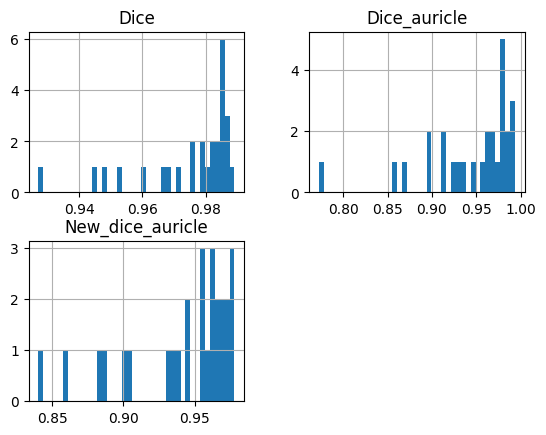

In [18]:
df[['Dice', 'Dice_auricle', 'New_dice_auricle']].hist(bins=40)

In [19]:
df[['Dice', 'Dice_auricle', 'New_dice_auricle']].describe()

Dice  Dice_auricle  New_dice_auricle
count  27.000000     27.000000         27.000000
mean    0.974919      0.944699          0.941764
std     0.015645      0.051593          0.037987
min     0.927145      0.772496          0.840264
25%     0.969958      0.920994          0.932289
50%     0.981982      0.965083          0.955363
75%     0.985617      0.980614          0.967166
max     0.989088      0.993401          0.977954

In [20]:
df_opa = df[df['LAA_opacification_defect']==1]

In [21]:
df_no_opa = df[df['LAA_opacification_defect']==0]

In [22]:
df_opa[['Dice', 'Dice_auricle', 'New_dice_auricle']].describe()

Dice  Dice_auricle  New_dice_auricle
count  11.000000     11.000000         11.000000
mean    0.974060      0.900187          0.914403
std     0.014360      0.053179          0.040548
min     0.944726      0.772496          0.840264
25%     0.973553      0.881940          0.891951
50%     0.978565      0.914997          0.929789
75%     0.982935      0.931546          0.945619
max     0.986129      0.969921          0.961686

In [23]:
df_no_opa[['Dice', 'Dice_auricle', 'New_dice_auricle']].describe()

Dice  Dice_auricle  New_dice_auricle
count  16.000000     16.000000         16.000000
mean    0.975510      0.975301          0.960575
std     0.016907      0.016633          0.021879
min     0.927145      0.926360          0.887988
25%     0.967772      0.967994          0.958752
50%     0.984527      0.979165          0.964873
75%     0.985699      0.986879          0.973063
max     0.989088      0.993401          0.977954

In [24]:
df_opa

ID  Stroke_ait_history  peripheral_embolism_hist  embolism_hist  \
Unnamed: 0                                                                     
19           31                   0                         0              0   
31           49                   1                         0              1   
38           65                   0                         0              0   
64          106                   1                         0              1   
73          116                   0                         0              0   
75          120                   1                         0              1   
81          155                   1                         0              1   
95          239                   1                         0              1   
100         244                   0                         0              0   
128         277                   0                         0              0   
129         278                   1                         0              1   

            verified_thrombus  LAA_opacification_defect      Dice       IoU  \
Unnamed: 0                                                                    
19                          0                         1  0.971598  0.944765   
31                          0                         1  0.944726  0.895242   
38                          0                         1  0.948278  0.901643   
64                          0                         1  0.975508  0.952186   
73                          0                         1  0.978565  0.958029   
75                          0                         1  0.983048  0.966661   
81                          0                         1  0.976202  0.953511   
95                          0                         1  0.982822  0.966223   
100                         0                         1  0.986129  0.972637   
128                         0                         1  0.985807  0.972012   
129                         1                         1  0.981982  0.964602   

            nnUnet_id  Contour_Volume  New_dice_auricle  Dice_auricle  \
Unnamed: 0                                                              
19               19.0         14026.0          0.899998      0.969921   
31               32.0         27818.0          0.883904      0.896504   
38               39.0         30846.0          0.857623      0.895496   
64               65.0        169609.0          0.840264      0.772496   
73               74.0        161315.0          0.904232      0.860201   
75               76.0        117334.0          0.954913      0.930389   
81               82.0        195677.0          0.946557      0.868384   
95               95.0        121917.0          0.934789      0.914997   
100             100.0        105592.0          0.961686      0.945341   
128             128.0        113819.0          0.929789      0.915627   
129             129.0        129989.0          0.944680      0.932703   

            Dice_corps  Dice_RSPV_1  Dice_RIPV_2  Dice_LIPV_3  Dice_LSPV_4  \
Unnamed: 0                                                                   
19            0.991824     0.992749     0.975336     0.988331     0.968539   
31            0.984641     0.862466     0.831887     0.971612     0.945295   
38            0.984273     0.982149     0.908049     0.846910     0.883724   
64            0.995920     0.997302     0.988000     0.991607     0.991134   
73            0.995717     0.953697     0.976110     0.964853     0.987785   
75            0.997588     0.999163     0.996878     0.999350     0.992989   
81            0.991353     0.974297     0.956720     0.975226     0.876527   
95            0.996371     0.996672     0.974087     0.989139     0.996059   
100           0.996691     0.989531     0.995283     0.998699     0.996481   
128           0.996572     0.989206     0.960078     0.972578     0.983995   
129           0.997098     0.994908     0.982716     0.981

In [1]:
12

12

In [2]:
12//10

1

In [3]:
12/10

1.2

In [4]:
12%10

2

In [5]:
498 //250

1

In [7]:
(498 //250 +1) *250

500